In [9]:
#Kaleb Kautzsch
#Date Started 25-Nov-19
#Potts Model in different sized lattices in q-states
%matplotlib inline
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt 

In [47]:
#Set the q-state to be observed
q = 4

#Defining the initial spin for lattice L
def initialSpin(L):
    S = rand.randint(q,size=(L,L))
    return S

In [48]:
#Defining the Kronecker delta from the standard Hamiltonian function used for the Pott's Model
#which is H_p = J_p*cumsum(delta(n_i,n_j))
def kronecker(N1,N2):
    """Kronecker delta states that it will equal 1 whenever n1=n2 and zero otherwise"""
    if (N1 == N2):
        return 1 
    else:
        return 0

In [49]:
#Defining the initial energy needed for the model
def initialEnergy(S):
    E,L = 0,len(S)
    """A loop needed to define the Kronecker delta values out to the i and j states"""
    for i in range(L):
        for j in range(L):
            energyRight = kronecker([i,j], [i,(j+1)%L])
            energyBot = kronecker([i,j], [(i+1)%L,j])
            E -= energyRight+energyBot
    return E

In [50]:
#Defining a function for the magnetization of particles
def Magnetization(S):
    L,m = len(S),0
    for i in range(L):
        for j in range(L):
            """If the spin states at 1 and 1 are both equal to what the ith and jth state is add 1 to the magnetization"""
            if(S[1,1] == S[i,j]):
                m += 1
    """Divide by the lattice size to get an average magnetization"""
    m /= (L**2)
    return abs(m)

In [51]:
#Function for calculating the energy differences in a given lattice
def deltaE(S,i,j):
    L = len(S)
    '''Determining the energy for all neighbors given by Kronecker function'''
    energyRight1, energyLeft1 = kronecker(S[i,j], S[i,(j+1)%L]), kronecker(S[i,j], S[i,(j-1)%L])
    energyTop1, energyBot1 = kronecker(S[i,j], S[(i-1)%L,j]), kronecker(S[i,j], S[(i+1)%L,j])
    Sum1 = -(energyRight1 + energyLeft1 + energyTop1 + energyBot1) #Summation of energies from the exponential
    '''Pick a random state from variable q'''
    Srand = rand.randint(q)
    '''Energy for the next set of neighbors using psudorandom choice from above'''
    energyRight2, energyLeft2 = kronecker(Srand, S[i,(j+1)%L]), kronecker(Srand, S[i,(j-1)%L])
    energyTop2, energyBot2 = kronecker(Srand, S[(i-1)%L,j]), kronecker(Srand, S[(i+1)%L,j])
    Sum2 = -(energyRight2 + energyLeft2 + energyTop2 + energyBot2)
    
    return Sum2 - Sum1, Srand

In [52]:
#Metropolis algorithm update function
def Mupdate(S,beta):
    L = len(S)
    result = 0
    '''A for loop to randomly select states within the lattice'''
    for k in range(L*L):
        i,j = rand.randint(L), rand.randint(L)
        energydiff, Srand = deltaE(S,i,j)
        if rand.random() < np.exp(-beta*energydiff): #The exponential is the Boltzmann distribution
            S[i,j] = Srand
            result += energydiff
    return result

In [53]:
#Function of the main calculation to simulate the model
def f(L):
    '''Lattice size; Number of points; Thermal Temperature; Index'''
    L, N, Ttherm, index = 8, 10000, 1000, 0
    '''The critical temperature that is measured in factors of J which determines what phase the magnetization will be in'''
    Tc = 2/(np.log(1 + np.sqrt(2)))
    Magarray, Temparray = [],[]
    '''Calculate and iterate over the change in temperature'''
    for T in np.linspace(0.1,Tc):
        beta = 1/T
        S = initialSpin(L)
        E = initialEnergy(S)
        energySum = 0
        magDensity = 0
        '''Update the energy values based on Metropolis updates'''
        for i in range(Ttherm):
            E += Mupdate(S,beta)
        for i in range(N):
            E += Mupdate(S,beta)
            energySum = E/(L*L) #Average energy in the lattice
            m = Magnetization(S)
            magDensity += m
        '''Append the array's'''    
        Magarray.append(magDensity/N)
        Temparray.append(T)
        index += 1
    return Magarray, Temparray

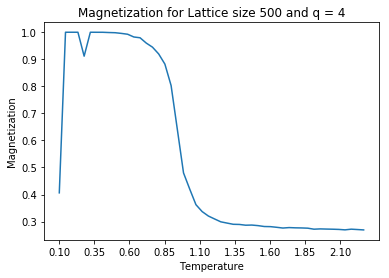

In [54]:
#Lattice Size 500 and q=4,6,8,10
M, T = f(500)
plt.plot(T,M)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.xticks(np.arange(min(T),max(T),0.25))
plt.title('Magnetization for Lattice size 500 and q = 4')
plt.savefig('q_4.png')
plt.show()